In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [64]:
def train_multi_hopfield(N,seq):
    W = np.zeros((N,N))
    k = len(seq)
    for i in range(0,N-1):
        for j in range(i+1,N):
            for mem in seq:
                mem = mem.flatten()
                W[i,j] = W[i,j]+(1/k)*mem[i]*mem[j]
    W = W+ np.transpose(W)
    return W

def run_hopfield(W,v0,steps,threshold=None):
    N = np.shape(W)[0]
    if threshold is None:
        threshold = np.zeros(N)
    sequence =np.zeros((steps,N),dtype=int)
    sequence[0,:] = v0
    for step in range(0,steps-1):
        neuron = np.random.randint(N)
        prod = sequence[step,:]@W
        sequence[step+1,:] = sequence[step,:]
        if prod[neuron]>=threshold[neuron]:
            sequence[step+1,neuron] = int(1)
        else:
            sequence[step+1,neuron] = int(-1)
    return sequence

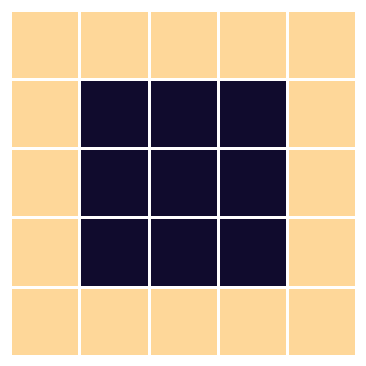

In [65]:
N = 5*5
cross = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
])
x = np.array([
    [1, 0, 0, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [1, 0, 0, 0, 1]
])
square = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1]
])
memories = [2*cross-1,2*x-1,2*square-1]
fig, ax = plt.subplots(1,1)
fig.set_size_inches(4,4)
sns.heatmap(square,cmap='magma',cbar=False,ax=ax,vmin=-0.1,vmax=1.1,linewidths=1, linecolor='white')
plt.tight_layout()
plt.axis('off')
plt.show()

W = train_multi_hopfield(N,memories)

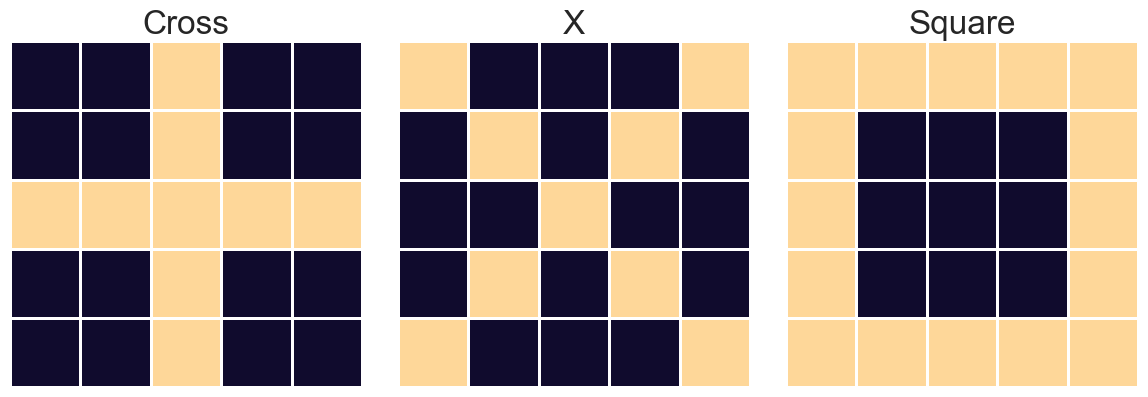

In [87]:
sns.set(font_scale=2)
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,4.5)
labels = ['Cross','X','Square']
for i in range(0,len(memories)):
    show_state = (memories[i].reshape(5,5)+1)/2
    sns.heatmap(show_state,cmap='magma',cbar=False,ax=ax[i],vmin=-0.1,vmax=1.1,linewidths=1, linecolor='white')
    ax[i].axis('off')
    ax[i].set_title(labels[i])
plt.tight_layout()
plt.show()
fig.savefig('patterns.pdf', format="pdf", bbox_inches="tight")

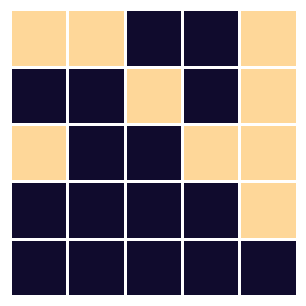

In [120]:
M = 5
N = M*M
IC = np.array([
    [1, 1, 0, 0, 1],
    [0, 0, 1, 0, 1],
    [1, 0, 0, 1, 1],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
])
fig, ax = plt.subplots(1,1)
fig.set_size_inches(4,4)
sns.heatmap(IC,cmap='magma',cbar=False,ax=ax,vmin=-0.1,vmax=1.1,linewidths=1, linecolor='white')
plt.tight_layout()
plt.axis('off')
plt.show()

In [121]:
IC = 2*IC-1
states = run_hopfield(W,IC.flatten(),200)

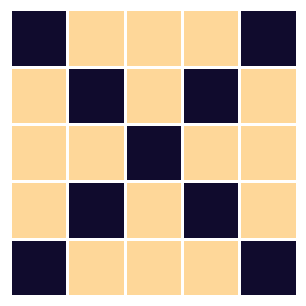

In [122]:
show_state = (states[199].reshape(5,5)+1)/2
fig, ax = plt.subplots(1,1)
fig.set_size_inches(4,4)
sns.heatmap(show_state,cmap='magma',cbar=False,ax=ax,vmin=-0.1,vmax=1.1,linewidths=1, linecolor='white')
plt.tight_layout()
plt.axis('off')
plt.show()

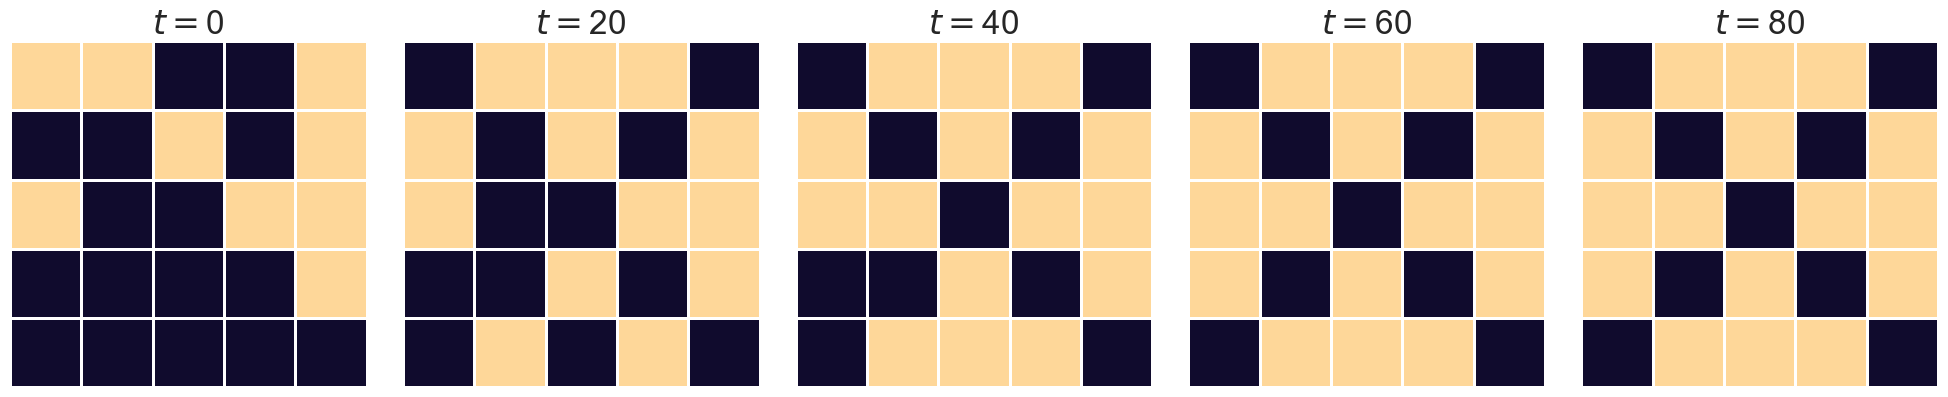

In [123]:
sns.set(font_scale=2)
fig, ax = plt.subplots(1,5)
fig.set_size_inches(20,4.5)
seq =[0,20,40,60,80]
for i in range(0,5):
    show_state = (states[seq[i]].reshape(5,5)+1)/2
    sns.heatmap(show_state,cmap='magma',cbar=False,ax=ax[i],vmin=-0.1,vmax=1.1,linewidths=1, linecolor='white')
    ax[i].axis('off')
    ax[i].set_title(r'$t=$'+str(seq[i]))
plt.tight_layout()
plt.show()
fig.savefig('multidiverge.pdf', format="pdf", bbox_inches="tight")